* Imported Packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler,MaxAbsScaler
import pickle
from sklearn.preprocessing import FunctionTransformer

* Get shared variables

In [16]:
with open("shared_variables.pkl", "rb") as f:
    columns = pickle.load(f)
    X_train = pickle.load(f)
    y_train = pickle.load(f)
    X_test = pickle.load(f)
    y_test = pickle.load(f)
    X_valid = pickle.load(f)

* Feature Engineering
1. Removing Outliers
    * Using the boxplot visualized in Exploratory part, the IQR of of each feature is calculated to remove outliers less than the lower bound (less than 25%) and the upper bound (more than 75%) 

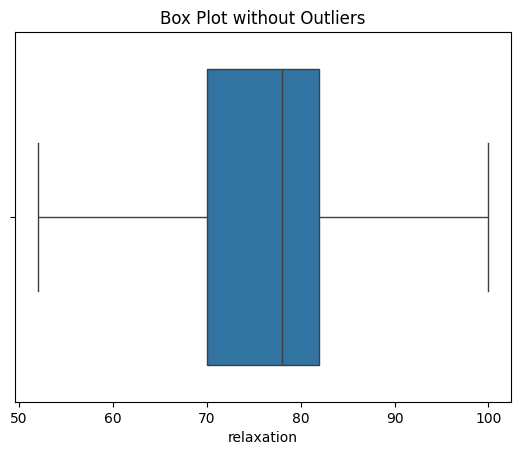

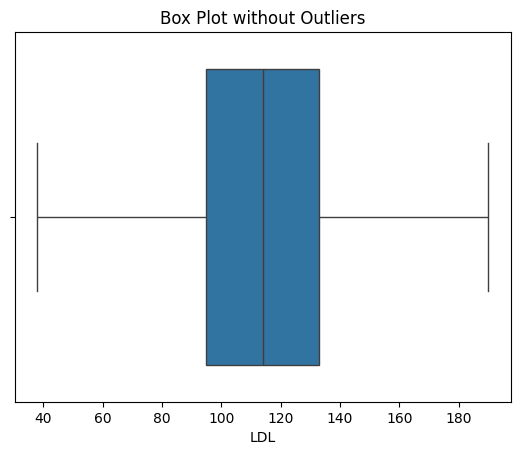

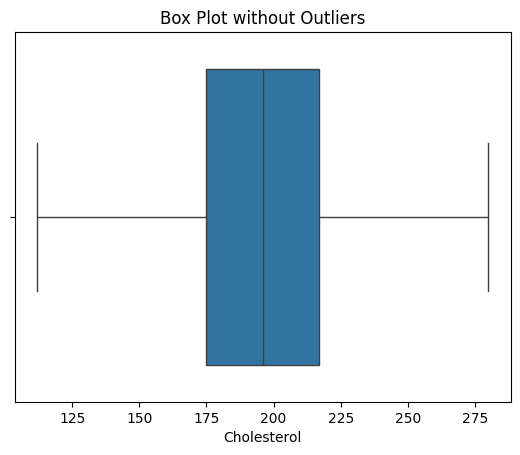

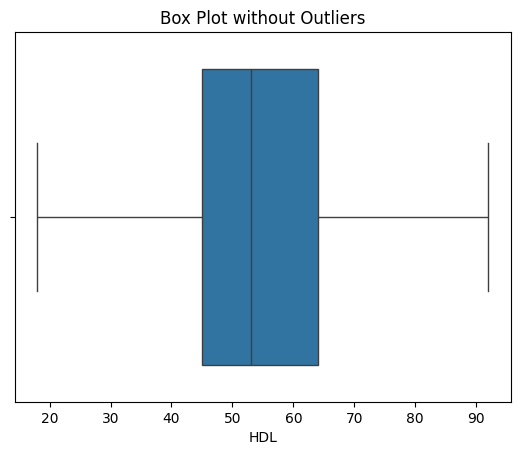

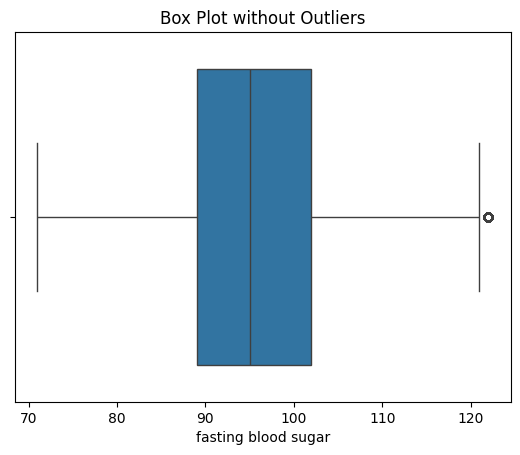

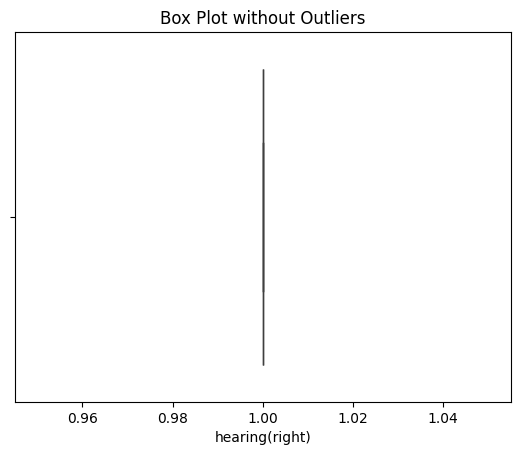

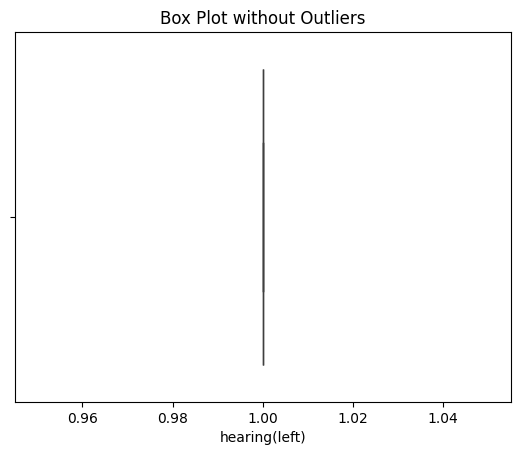

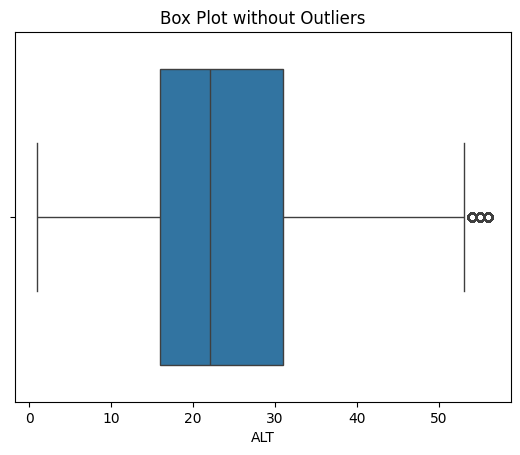

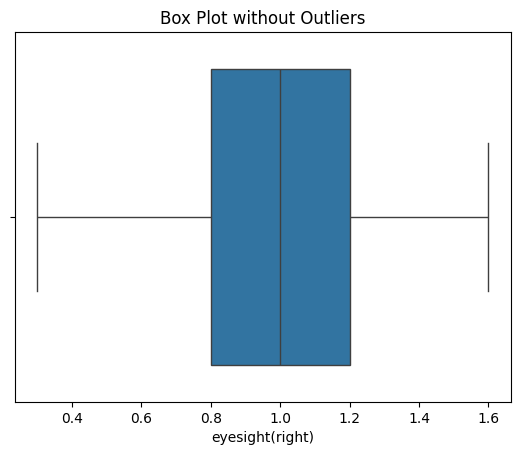

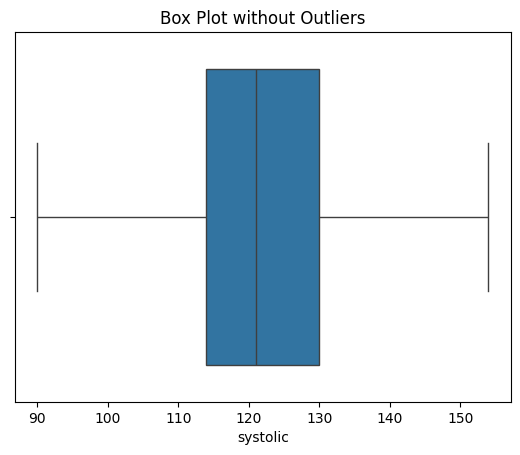

In [45]:
# Calculate IQR
for column_for_analysis in columns:
    Q1 = X_train[column_for_analysis].quantile(0.25)
    Q3 =  X_train[column_for_analysis].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and filter outliers
    outliers = ( X_train[column_for_analysis] < lower_bound) | ( X_train[column_for_analysis] > upper_bound)
    X_train = X_train[~outliers]

    # Display the box plot after removing outliers
    sns.boxplot(x=X_train[column_for_analysis])
    plt.title('Box Plot without Outliers')
    plt.show()

2. Normalization

In [6]:
scaler = MaxAbsScaler()
X_train['relaxation'] = scaler.fit_transform(X_train[['relaxation']])
X_train['Cholesterol'] = scaler.fit_transform(X_train[['Cholesterol']])
X_train['eyesight(right)'] = scaler.fit_transform(X_train[['eyesight(right)']])
X_train['systolic'] = scaler.fit_transform(X_train[['systolic']])

scaler_minmax = MinMaxScaler()
X_train['hearing(right)'] = scaler_minmax.fit_transform(X_train[['hearing(right)']])
X_train['hearing(left)'] = scaler_minmax.fit_transform(X_train[['hearing(left)']])

scaler_zscore = StandardScaler()
X_train['LDL'] = scaler_zscore.fit_transform(X_train[['LDL']])
X_train['HDL'] = scaler_zscore.fit_transform(X_train[['HDL']])
X_train['ALT'] = scaler_zscore.fit_transform(X_train[['ALT']])
X_train['fasting blood sugar'] = scaler_zscore.fit_transform(X_train[['fasting blood sugar']])


* MaxAbs Normalization is used in the following features because they are not Gaussian Distribution:
    1. relaxation
    2. Cholesterol
    3. Eyesights(right)
    4. systolic

* Min-Max Sacling is used in the following two features because they don't have many variations:
    1. hearing(right)
    2. hearing(left)

* Z-score is first used in the following two features because they are Gaussian Distribution:
    1. LDL
    2. HDL

* Z-score is also used in the following two features to handle the remaining few outliers:
    1. ALT
    2. fasting blood sugar


* Normalizing Validation Datasets

In [ ]:
scaler = MaxAbsScaler()
X_valid['relaxation'] = scaler.fit_transform(X_valid[['relaxation']])
X_valid['Cholesterol'] = scaler.fit_transform(X_valid[['Cholesterol']])
X_valid['eyesight(right)'] = scaler.fit_transform(X_valid[['eyesight(right)']])
X_valid['systolic'] = scaler.fit_transform(X_valid[['systolic']])

scaler_minmax = MinMaxScaler()
X_valid['hearing(right)'] = scaler_minmax.fit_transform(X_valid[['hearing(right)']])
X_valid['hearing(left)'] = scaler_minmax.fit_transform(X_valid[['hearing(left)']])

scaler_zscore = StandardScaler()
X_valid['LDL'] = scaler_zscore.fit_transform(X_valid[['LDL']])
X_valid['HDL'] = scaler_zscore.fit_transform(X_valid[['HDL']])
X_valid['ALT'] = scaler_zscore.fit_transform(X_valid[['ALT']])
X_valid['fasting blood sugar'] = scaler_zscore.fit_transform(X_valid[['fasting blood sugar']])

* Normalizing Test Datasets

In [ ]:
scaler = MaxAbsScaler()
X_test['relaxation'] = scaler.fit_transform(X_test[['relaxation']])
X_test['Cholesterol'] = scaler.fit_transform(X_test[['Cholesterol']])
X_test['eyesight(right)'] = scaler.fit_transform(X_test[['eyesight(right)']])
X_test['systolic'] = scaler.fit_transform(X_test[['systolic']])

scaler_minmax = MinMaxScaler()
X_test['hearing(right)'] = scaler_minmax.fit_transform(X_test[['hearing(right)']])
X_test['hearing(left)'] = scaler_minmax.fit_transform(X_test[['hearing(left)']])

scaler_zscore = StandardScaler()
X_test['LDL'] = scaler_zscore.fit_transform(X_test[['LDL']])
X_test['HDL'] = scaler_zscore.fit_transform(X_test[['HDL']])
X_test['ALT'] = scaler_zscore.fit_transform(X_test[['ALT']])
X_test['fasting blood sugar'] = scaler_zscore.fit_transform(X_test[['fasting blood sugar']])

3. Log Transformation

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


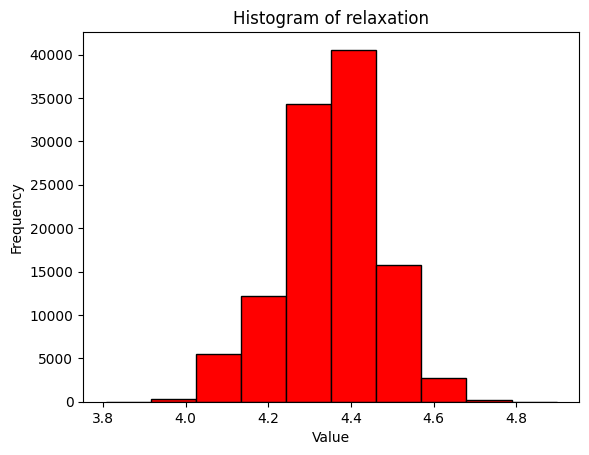

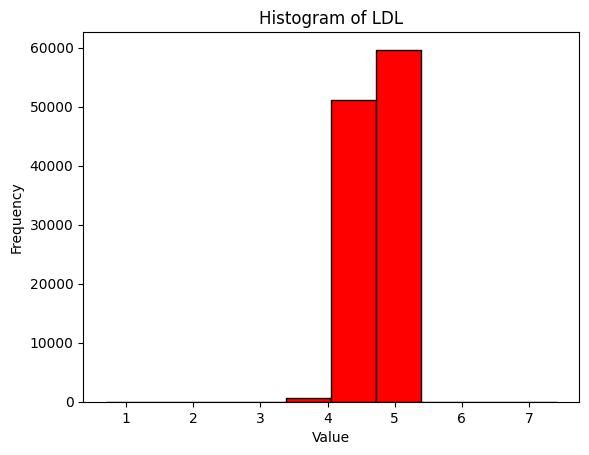

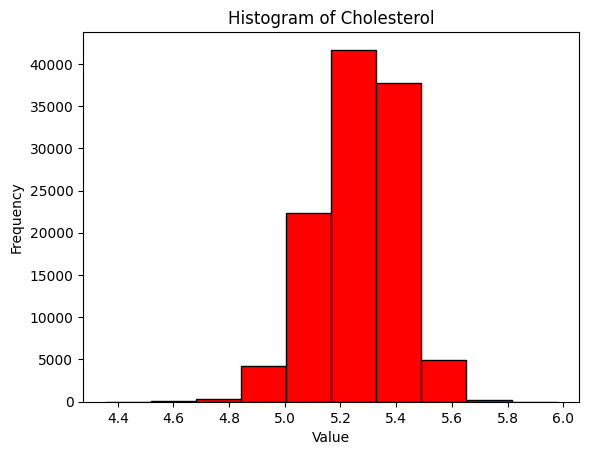

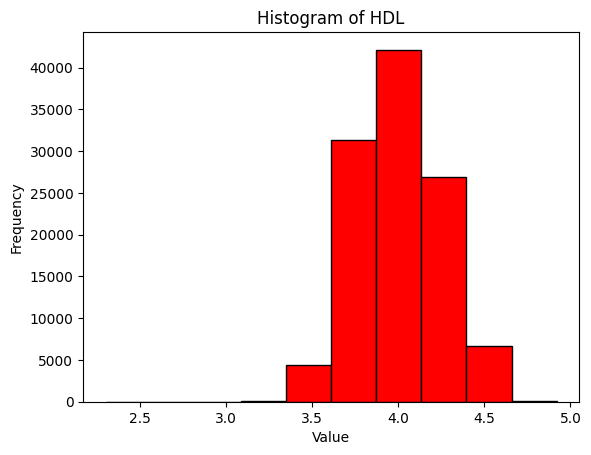

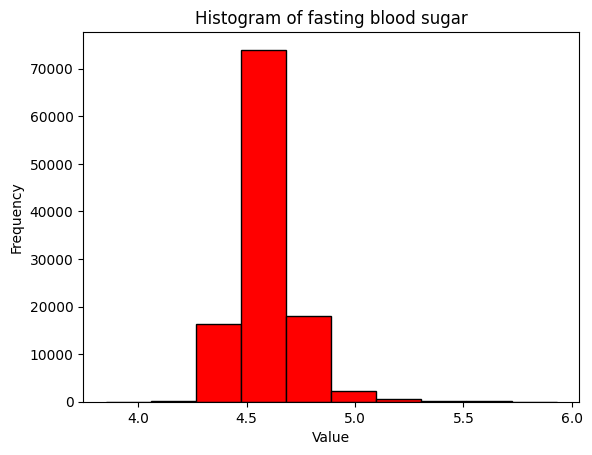

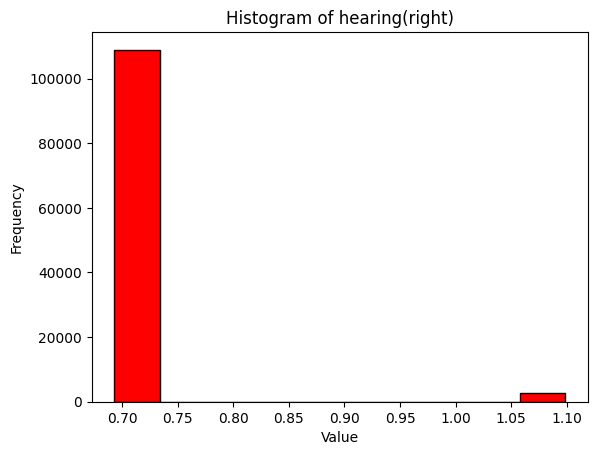

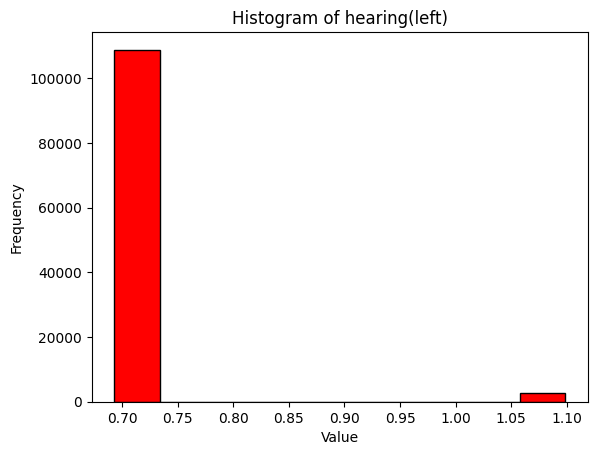

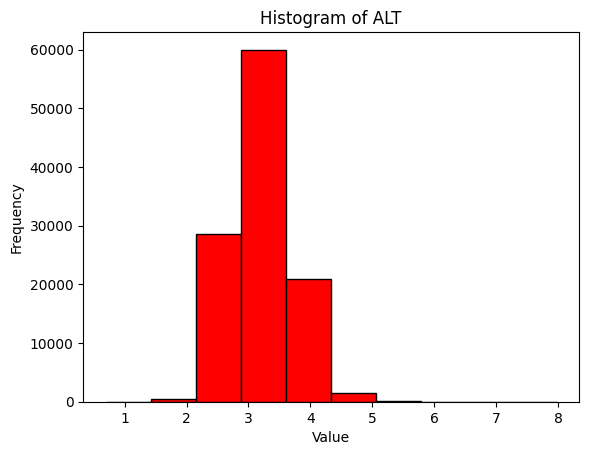

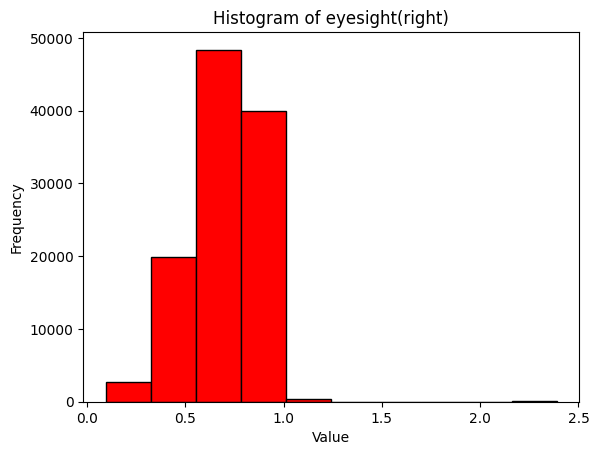

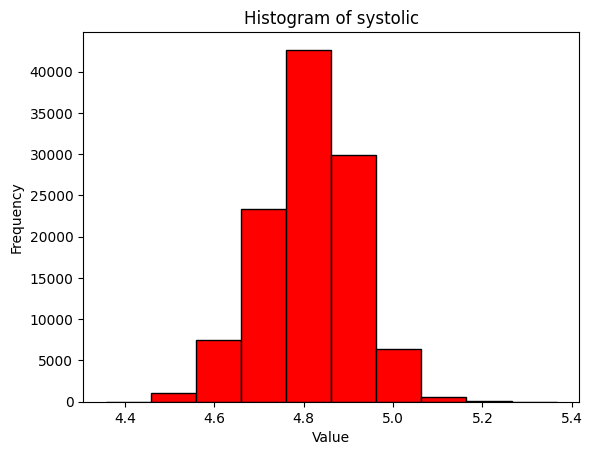

In [15]:
transformer = FunctionTransformer(np.log1p, validate=True, accept_sparse=True, check_inverse=True)
X_transformed = pd.DataFrame(transformer.transform(X_train), columns=X_train.columns)
X_transformed.to_csv('lof.csv')

for i in range (0,len(columns)):
    column_for_analysis = columns[i]
    
    # Histogram
    plt.figure()
    plt.hist(X_transformed[column_for_analysis], bins=10, color='red', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_for_analysis}')